<a href="https://colab.research.google.com/github/Edersao/Curso_Data_Scientist/blob/main/Prueba_texto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#para no batallar con .head()
pd.options.display.max_rows = 8
pd.options.display.max_columns = 10

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Lee en un dataframe woman_parl, el contenido del archivo WomanParliaments.csv
(ubicado en el apartado “Archivos adjuntos” de la plataforma) que almacena, por país, el porcentaje de escaños parlamentarios ocupados por mujeres desde 1997.
2. A partir del dataframe anterior obtén uno (mexico) donde únicamente almacenes la
información de Mexico.

In [22]:
woman_parl=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datos/visualizacion/datos_pruebatecto/1697825162018-WomanParliaments.csv')
mexico=woman_parl.loc[woman_parl['Country Name']=='Mexico']
mexico.drop(columns='Country Code',inplace=True)
mexico=mexico.T
mexico=mexico.drop(index=('Country Name'))
mexico=mexico.rename(columns={152:'Mexico'})
#mexico.index.name='Year'
#mexico.columns.name=''
mexico

<ipython-input-22-5b16e48d1b35>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mexico.drop(columns='Country Code',inplace=True)


,Mexico
1997,14.2
1998,17.4
1999,18.2
2000,16.0
...,...
2017,42.6
2018,48.2
2019,48.2
2020,48.2


3. Obtén otro dataframe (mex_world) con el promedio anual de todos los países y concaténalo con el de México para obtener el siguiente resultado:

In [23]:
world=pd.DataFrame(data=woman_parl.mean(),columns=['World'],index=woman_parl.mean().index)
world

<ipython-input-23-95722b738026>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  world=pd.DataFrame(data=woman_parl.mean(),columns=['World'],index=woman_parl.mean().index)
<ipython-input-23-95722b738026>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  world=pd.DataFrame(data=woman_parl.mean(),columns=['World'],index=woman_parl.mean().index)


,World
1997,10.243278
1998,10.926304
1999,11.394605
2000,11.822155
...,...
2017,21.516010
2018,22.054024
2019,22.827041
2020,23.908380


In [24]:
mex_world=pd.concat([mexico,world],axis=1)

In [25]:
#mex_world.loc[(mex_world.index=='2019') | (mex_world.index=='2020')]
#import datetime as dt
mex_world.index=pd.DatetimeIndex(mex_world.index)
#mex_world_mean=mex_world.groupby(pd.Grouper(freq="5Y")).mean()
mex_world.index=mex_world.index.year
mex_world

,Mexico,World
1997,14.2,10.243278
1998,17.4,10.926304
1999,18.2,11.394605
2000,16.0,11.822155
...,...,...
2017,42.6,21.516010
2018,48.2,22.054024
2019,48.2,22.827041
2020,48.2,23.908380


In [26]:
#mw_mean=[mex_world[0:4].mean()]
mex_world[3::5]

,Mexico,World
2000,16.0,11.822155
2005,24.2,15.279622
2010,26.2,17.508532
2015,42.369478,20.761977
2020,48.2,23.908380


4. Grafica el dataframe anterior, utilizando la plataforma Pandas, e incluye una tabla con los índices de ambas series. Personaliza las propiedades del gráfico para que se vea como en la siguiente imagen:

([], [])

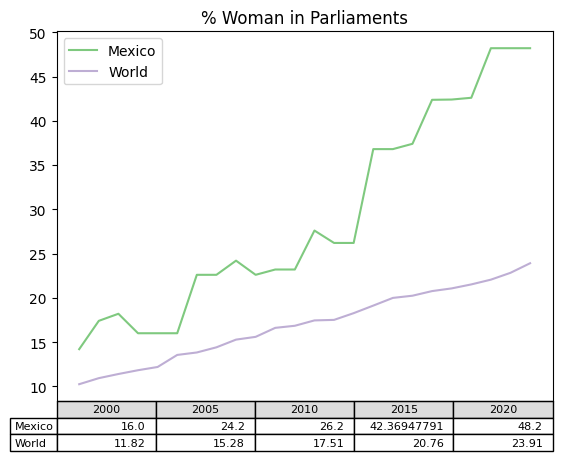

In [36]:
sns.set_palette('Accent')
mex_world.plot(title='% Woman in Parliaments')
plt.table(cellText=mex_world[3::5].round(2).T.values,colLabels=mex_world[3::5].T.columns,
          rowLabels=mex_world[3::5].T.index,
          colColours=['gainsboro']*5)
plt.xticks([])

5. Almacena en un dataframe (**metadata**), el contenido del archivo _Metadata.csv_ , el cual indica a qué región pertenece cada país, y combínalo con el dataframe **woman_parl**, usando la columna **Country Code**. Obtén los promedios por región del año 2020. Almacena el resultado en el dataframe **info_region**:

In [43]:
metadata=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datos/visualizacion/datos_pruebatecto/1697825167912-Metadata.csv')
data=woman_parl.merge(metadata,left_on='Country Code',right_on='Country Code',how='inner')
info_region=data['2020'].groupby(data['Region']).mean()
info_region=pd.DataFrame(data=info_region,columns=['2020'])

In [44]:
info_region

,2020
Region,
East Asia & Pacific,16.531978
Europe & Central Asia,29.814495
Latin America & Caribbean,28.145326
Middle East & North Africa,17.234940
North America,28.229436
South Asia,17.509109
Sub-Saharan Africa,22.672044


6. Crea un gráfico de barras del dataframe anterior con Seaborn. Incluye los valores del promedio obtenidos, como se muestra en la  figura:

<ipython-input-55-1adc856a097c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=info_region.index,y='2020',data=info_region,palette='pastel')


Text(0, 0.5, '')

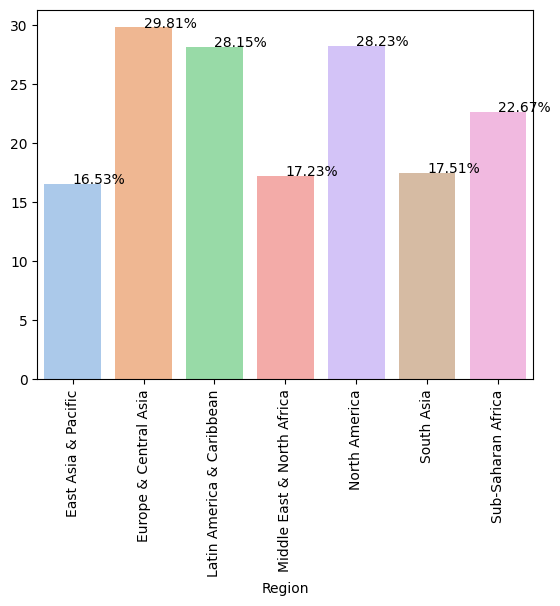

In [55]:
info_region=info_region.round(2)
sns.barplot(x=info_region.index,y='2020',data=info_region,palette='pastel')
for i in range(info_region.shape[0]):
  plt.text(i,info_region.iloc[i,0],str(info_region.iloc[i,0])+'%')
plt.xticks(rotation=90)
plt.ylabel('')

7. Grafica con Matplotlib la información de woman_parl 2020 en un boxplot y ubica a México según el valor de su índice.


In [91]:
#woman_parl2020['2020'].loc[woman_parl2020['Country Name']=='Mexico'][0]
woman_parl2020['2020'].loc[woman_parl2020['Country Name']=='Mexico'].index[0]

'MEX'

Text(0.5, 1.0, '% Woman in Parliaments')

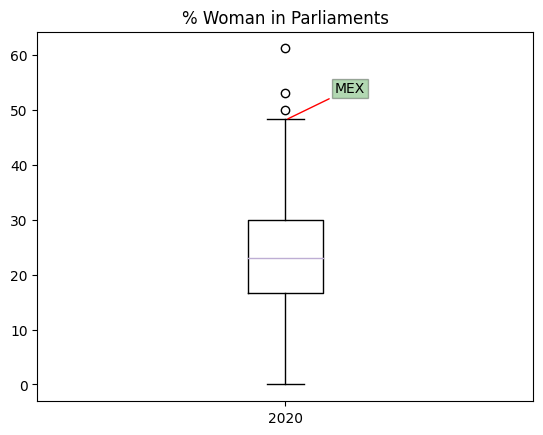

In [104]:
#plt.boxplot(woman_parl)
woman_parl2020=woman_parl[['Country Code','Country Name','2020']]
woman_parl2020.index=woman_parl2020['Country Code']
valor=woman_parl2020['2020'].loc[woman_parl2020['Country Name']=='Mexico'][0]
word=woman_parl2020['2020'].loc[woman_parl2020['Country Name']=='Mexico'].index[0]
plt.boxplot(woman_parl2020['2020'].dropna(),labels=['2020'])
plt.annotate(word,xy=(1,valor),xytext=(1.1,valor+5),
             arrowprops=dict(arrowstyle='-',color='red'),
             bbox=dict(facecolor='green',alpha=0.3,pad=2))
plt.title('% Woman in Parliaments')
#plt.annotate('MEX',xy=(1,mex_value),xytext=(1.1,mex_value+5),
#             arrowprops=dict(arrowstyle='-',color='red'),
#             bbox=dict(facecolor='green',alpha=0.3,pad=2))